# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

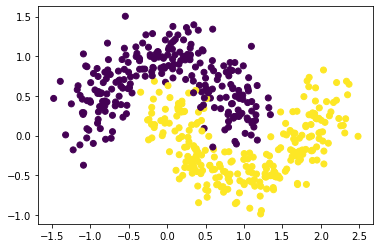

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
plt.show()

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(C=1000, solver='lbfgs') # add some params
svm = SVC(C=1000, kernel='linear') # here too

lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

SVC(C=1000, kernel='linear')

In [4]:
def make_plot(sample, labels, model, title):
    plt.figure(figsize = (6, 6))
    plot_decision_regions(X=sample, y=labels, clf=model)
    plt.title(title)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


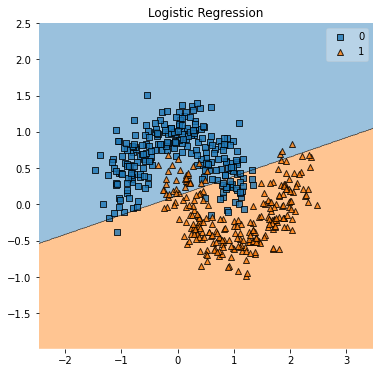

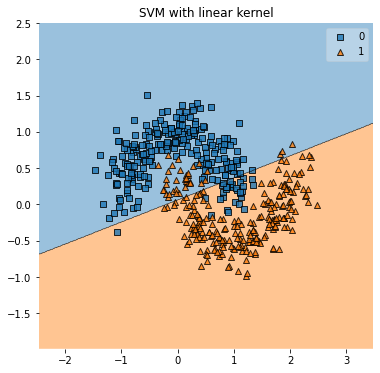

In [5]:
make_plot(moons_points, moons_labels, lr, "Logistic Regression")
make_plot(moons_points, moons_labels, svm, "SVM with linear kernel")

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
print(f"Accuracy score Logistic Regression: {accuracy_score(moons_labels, lr.predict(moons_points))}")
print(f"Accuracy score SVM: {accuracy_score(moons_labels, svm.predict(moons_points))}")

Accuracy score Logistic Regression: 0.86
Accuracy score SVM: 0.862


- Accuracy is slightly less for Logistic Regression, than for SVM
- Both models describe our data not very well

## 1.2 Kernel trick

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [8]:
from tqdm import tqdm

In [9]:
def find_params(kernel_, sample_, labels_):
  best_acc = 0
  if kernel_ == 'poly':
    best_estimator = SVC(
              degree=2,
              gamma='auto',
              kernel=kernel_
          )
  else:
    best_estimator = SVC(
              gamma='auto',
              kernel=kernel_
          )
    
  for C in tqdm(np.logspace(-2, 2, 5)):
    for gamma in np.logspace(-3, 0, 4):
      if kernel_ == 'poly':
        for degree in np.arange(2, 8):
          for coef in np.arange(-3, 3, 0.5):
            model = SVC(
                C=C,
                coef0=coef,
                degree=degree,
                gamma=gamma,
                kernel=kernel_
            )
            model.fit(sample_, labels_)
            acc = accuracy_score(labels_, model.predict(sample_))
            if acc > best_acc:
              best_acc = acc
              best_estimator = model
      elif kernel_ == 'sigmoid':
        for coef in np.arange(-3, 3, 0.5):
          model = SVC(
              C=C,
              coef0=coef,
              gamma=gamma,
              kernel=kernel_
          )
          model.fit(sample_, labels_)
          acc = accuracy_score(labels_, model.predict(sample_))
          if acc > best_acc:
            best_acc = acc
            best_estimator = model
      else:
        model = SVC(
              C=C,
              gamma=gamma,
              kernel=kernel_
          )
        model.fit(sample_, labels_)
        acc = accuracy_score(labels_, model.predict(sample_))
        if acc > best_acc:
          best_acc = acc
          best_estimator = model
  return best_acc, best_estimator

In [10]:
acc_poly, svm_poly = find_params('poly', moons_points, moons_labels)

100%|██████████| 5/5 [00:20<00:00,  4.19s/it]


In [11]:
acc_rbf, svm_rbf = find_params('rbf', moons_points, moons_labels)

100%|██████████| 5/5 [00:00<00:00, 18.10it/s]


In [12]:
acc_sigm, svm_sigm = find_params('sigmoid', moons_points, moons_labels)

100%|██████████| 5/5 [00:04<00:00,  1.08it/s]


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


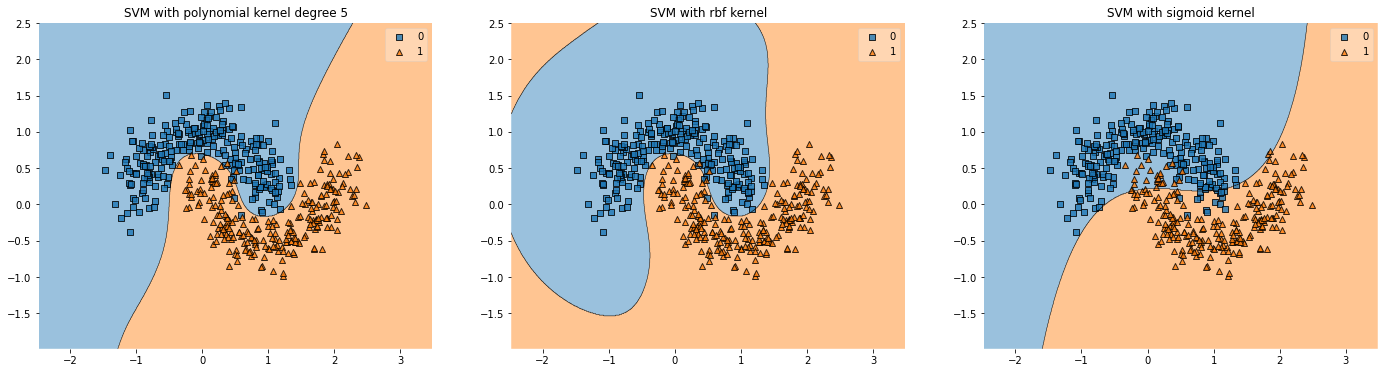

In [13]:
degree = svm_poly.get_params()['degree']

models = [svm_poly, svm_rbf, svm_sigm]
titles = [f"SVM with polynomial kernel degree {degree}", 
          "SVM with rbf kernel", 
          "SVM with sigmoid kernel"]

plt.figure(figsize=(24, 6))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plot_decision_regions(moons_points, moons_labels, models[i])
    plt.title(titles[i])

In [14]:
print(f"Accuracy score SVM with polynomial kernel degree {degree}: {acc_poly}")
print(f"Accuracy score SVM with rbf kernel: {acc_rbf}")
print(f"Accuracy score SVM with sigmoid kernel: {acc_sigm}")

Accuracy score SVM with polynomial kernel degree 5: 0.988
Accuracy score SVM with rbf kernel: 0.984
Accuracy score SVM with sigmoid kernel: 0.912


In [15]:
params = {
    'poly' : svm_poly.get_params(),
    'rbf' : svm_rbf.get_params(),
    'sigmoid' : svm_sigm.get_params()
    }

print(f"Poly SVM parameters: C = {params['poly']['C']}, gamma = {params['poly']['gamma']}, coef0 = {params['poly']['coef0']}")
print(f"RBF SVM parameters: C = {params['rbf']['C']}, gamma = {params['rbf']['gamma']}")
print(f"Sigmoid SVM parameters: C = {params['sigmoid']['C']}, gamma = {params['sigmoid']['gamma']}, coef0 = {params['sigmoid']['coef0']}")

Poly SVM parameters: C = 10.0, gamma = 1.0, coef0 = 1.0
RBF SVM parameters: C = 100.0, gamma = 1.0
Sigmoid SVM parameters: C = 100.0, gamma = 0.1, coef0 = -1.5


Using other kernels allowed to improve the quality of the model and get more accuracy. The boundary is no longer a straight line and fewer objects fall into the area of another class in the figure.The best model: SVM with "poly" kernel degree 5
(optimal parameters, which give more accuracy, for all models were chosen by brute force).

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Compare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [17]:
def find_params_logreg(sample_, labels_):
  best_acc = 0
  best_estimator = make_pipeline(
      PolynomialFeatures(2),
      LogisticRegression(solver='newton-cg')
  )
  for C in tqdm(np.logspace(-2, 2, 5)):
    for degree in np.arange(2, 8):
      model = make_pipeline(
          PolynomialFeatures(degree),
          LogisticRegression(C=C, solver='newton-cg')
      )
      model.fit(sample_, labels_)
      acc = accuracy_score(labels_, model.predict(sample_))
      if acc > best_acc:
        best_acc = acc
        best_estimator = model
  return best_acc, best_estimator

In [18]:
acc_lr, lr_poly = find_params_logreg(moons_points, moons_labels)

100%|██████████| 5/5 [00:00<00:00,  9.30it/s]


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

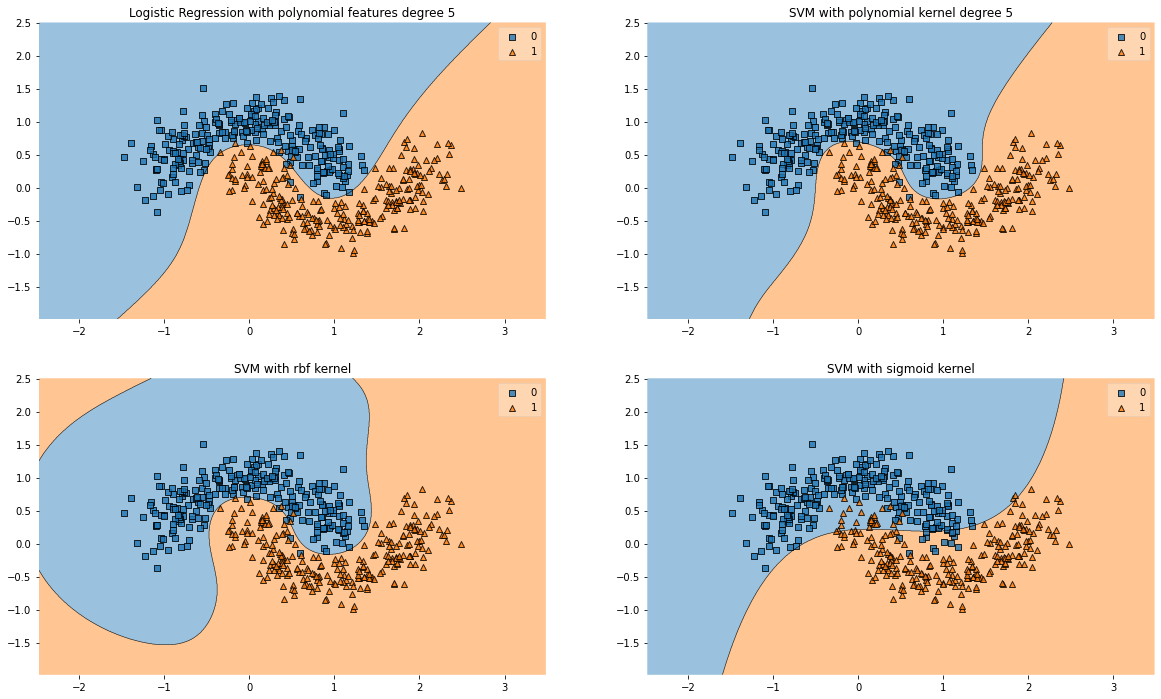

In [19]:
lr_degree = lr_poly.get_params()['polynomialfeatures__degree']
lr_C = lr_poly.get_params()['logisticregression__C']

models = [lr_poly, svm_poly, svm_rbf, svm_sigm]
titles = [f"Logistic Regression with polynomial features degree {lr_degree}", 
          f"SVM with polynomial kernel degree {degree}", 
          "SVM with rbf kernel", 
          "SVM with sigmoid kernel"]

plt.figure(figsize=(20, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plot_decision_regions(moons_points, moons_labels, models[i])
    plt.title(titles[i])

In [20]:
print(f"Accuracy score Logistic Regression with polynomial features degree {lr_degree}: {acc_lr}")
print(f"C = {lr_C}")

Accuracy score Logistic Regression with polynomial features degree 5: 0.986
C = 10.0


- The type of the border is similar to the border for SVM in the case of using kernel "poly". 
- Accuracy score for logistic regression with polynomial features lied between accuracy for "rbf" and "poly". 
- The best degree for logistic regression = 5 (the same as for SVM "poly")

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

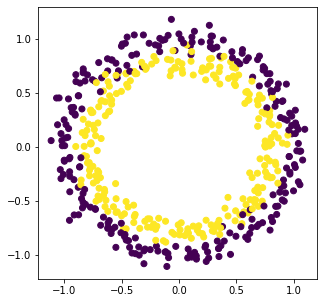

In [21]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)
plt.show()

In [22]:
acc_poly, svm_poly = find_params('poly', circles_points, circles_labels)

100%|██████████| 5/5 [00:20<00:00,  4.01s/it]


In [23]:
acc_lr, lr_poly = find_params_logreg(circles_points, circles_labels)

100%|██████████| 5/5 [00:00<00:00, 12.62it/s]


In [24]:
acc_rbf, svm_rbf = find_params('rbf', circles_points, circles_labels)

100%|██████████| 5/5 [00:00<00:00, 11.35it/s]


In [25]:
acc_sigm, svm_sigm = find_params('sigmoid', circles_points, circles_labels)

100%|██████████| 5/5 [00:05<00:00,  1.19s/it]


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

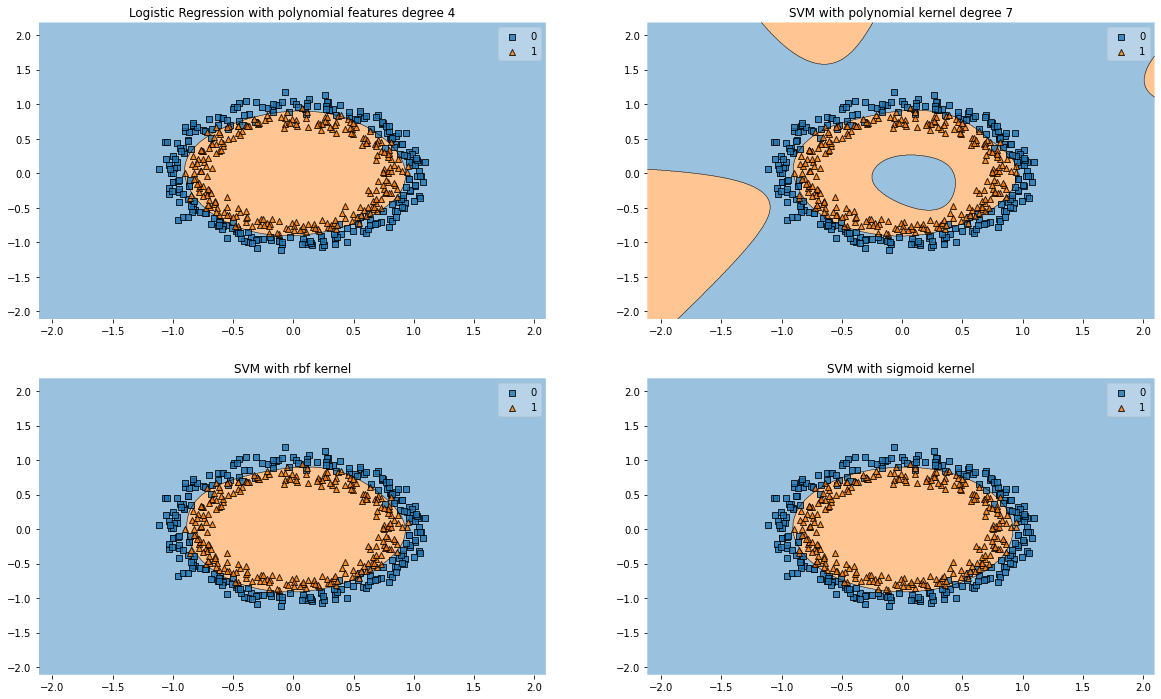

In [26]:
degree = svm_poly.get_params()['degree']
lr_degree = lr_poly.get_params()['polynomialfeatures__degree']
lr_C = lr_poly.get_params()['logisticregression__C']

models = [lr_poly, svm_poly, svm_rbf, svm_sigm]
titles = [f"Logistic Regression with polynomial features degree {lr_degree}", 
          f"SVM with polynomial kernel degree {degree}", 
          "SVM with rbf kernel", 
          "SVM with sigmoid kernel"]

plt.figure(figsize=(20, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plot_decision_regions(circles_points, circles_labels, models[i])
    plt.title(titles[i])

In [27]:
print(f"Accuracy score Logistic Regression with polynomial features degree {lr_degree}: {acc_lr}")
print(f"Accuracy score SVM with polynomial kernel degree {degree}: {acc_poly}")
print(f"Accuracy score SVM with rbf kernel: {acc_rbf}")
print(f"Accuracy score SVM with sigmoid kernel: {acc_sigm}")

Accuracy score Logistic Regression with polynomial features degree 4: 0.944
Accuracy score SVM with polynomial kernel degree 7: 0.952
Accuracy score SVM with rbf kernel: 0.946
Accuracy score SVM with sigmoid kernel: 0.942


In [28]:
params = {
    'poly' : svm_poly.get_params(),
    'rbf' : svm_rbf.get_params(),
    'sigmoid' : svm_sigm.get_params()
    }

print(f"Poly LogReg parameters: C = {lr_C}")
print(f"Poly SVM parameters: C = {params['poly']['C']}, gamma = {params['poly']['gamma']}, coef0 = {params['poly']['coef0']}")
print(f"RBF SVM parameters: C = {params['rbf']['C']}, gamma = {params['rbf']['gamma']}")
print(f"Sigmoid SVM parameters: C = {params['sigmoid']['C']}, gamma = {params['sigmoid']['gamma']}, coef0 = {params['sigmoid']['coef0']}")

Poly LogReg parameters: C = 100.0
Poly SVM parameters: C = 100.0, gamma = 1.0, coef0 = 2.0
RBF SVM parameters: C = 100.0, gamma = 1.0
Sigmoid SVM parameters: C = 10.0, gamma = 1.0, coef0 = -2.0


And even more:

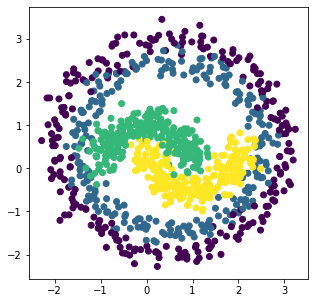

In [29]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)
plt.show()

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [30]:
# acc_poly, svm_poly = find_params('poly', points, labels)
svm_poly = SVC(C=100.0, gamma=1.0, coef0=2.0, kernel='poly')
svm_poly.fit(points, labels)
acc_poly = accuracy_score(labels, svm_poly.predict(points))

100%|██████████| 5/5 [3:35:55<00:00, 2591.16s/it]


In [31]:
acc_lr, lr_poly = find_params_logreg(points, labels)

 80%|████████  | 4/5 [00:04<00:01,  1.45s/it]/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
100%|██████████| 5/5 [00:07<00:00,  1.58s/it]


In [32]:
acc_rbf, svm_rbf = find_params('rbf', points, labels)

100%|██████████| 5/5 [00:01<00:00,  3.21it/s]


In [33]:
acc_sigm, svm_sigm = find_params('sigmoid', points, labels)

100%|██████████| 5/5 [00:28<00:00,  5.64s/it]


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

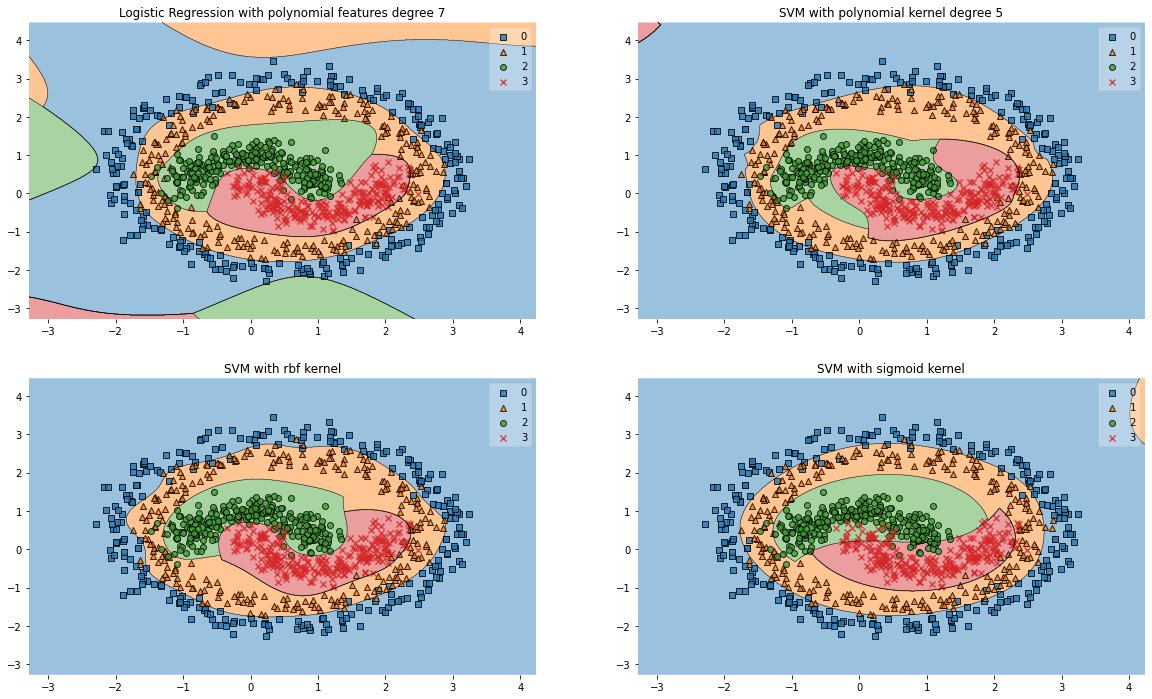

In [34]:
degree = svm_poly.get_params()['degree']
lr_degree = lr_poly.get_params()['polynomialfeatures__degree']
lr_C = lr_poly.get_params()['logisticregression__C']

models = [lr_poly, svm_poly, svm_rbf, svm_sigm]
titles = [f"Logistic Regression with polynomial features degree {lr_degree}", 
          f"SVM with polynomial kernel degree {degree}", 
          "SVM with rbf kernel", 
          "SVM with sigmoid kernel"]

plt.figure(figsize=(20, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plot_decision_regions(points, labels, models[i])
    plt.title(titles[i])

In [35]:
print(f"Accuracy score Logistic Regression with polynomial features degree {lr_degree}: {acc_lr}")
print(f"Accuracy score SVM with polynomial kernel degree {degree}: {acc_poly}")
print(f"Accuracy score SVM with rbf kernel: {acc_rbf}")
print(f"Accuracy score SVM with sigmoid kernel: {acc_sigm}")

Accuracy score Logistic Regression with polynomial features degree 7: 0.949
Accuracy score SVM with polynomial kernel degree 5: 0.956
Accuracy score SVM with rbf kernel: 0.952
Accuracy score SVM with sigmoid kernel: 0.902


In [36]:
params = {
    'poly' : svm_poly.get_params(),
    'rbf' : svm_rbf.get_params(),
    'sigmoid' : svm_sigm.get_params()
    }

print(f"Poly LogReg parameters: C = {lr_C}")
print(f"Poly SVM parameters: C = {params['poly']['C']}, gamma = {params['poly']['gamma']}, coef0 = {params['poly']['coef0']}")
print(f"RBF SVM parameters: C = {params['rbf']['C']}, gamma = {params['rbf']['gamma']}")
print(f"Sigmoid SVM parameters: C = {params['sigmoid']['C']}, gamma = {params['sigmoid']['gamma']}, coef0 = {params['sigmoid']['coef0']}")

Poly LogReg parameters: C = 10.0
Poly SVM parameters: C = 100.0, gamma = 1.0, coef0 = 2.0
RBF SVM parameters: C = 100.0, gamma = 1.0
Sigmoid SVM parameters: C = 100.0, gamma = 0.1, coef0 = -1.5


Thus, in the case of multiple classes:
- SVM with polynomial kernel give the best results. 
- SVM with RBF kernel became better than Logistic regression with polynomial features